### Load Datasets

In [46]:
%load_ext autoreload
%autoreload 2

import numpy as np
from NN import NN
from util import compute_clean_data
import matplotlib.pyplot as plt 

# init datasets
full_train_X, full_train_Y = compute_clean_data("data/mnist_train.csv")
full_test_X, full_test_Y = compute_clean_data("data/mnist_test.csv")

mini_train_X, mini_train_Y = compute_clean_data("data/mnist_train_100.csv")
mini_test_X, mini_test_Y = compute_clean_data("data/mnist_test_10.csv")

half_train_X, half_train_Y = full_train_X[30000:], full_train_Y[30000:]
half_test_X, half_test_Y = full_test_X[5000:], full_test_Y[5000:]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Find Optimal Learning Rate

In [48]:
# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.01,
    train_X=full_train_X,
    train_Y=full_train_Y,
)
nn.setTestData(test_X=full_test_X, test_Y=full_test_Y)

alphas = [0.01, 0.015, 0.03, 0.05, 0.1]
losses = []

# Iterate through alphas to find optimal learning rate
for alpha in alphas:
    nn.setAlpha(alpha)
    print(f'alpha = {alpha}')
    nn.train()
    _, cur_loss = nn.test()
    losses.append(cur_loss)
    print()

    nn.randomizeWeights()

print(alphas)
print(losses)

alpha = 0.01
Loss on iteration 10000 = 5.571514309182906
Loss on iteration 20000 = 3.9681887678483303
Loss on iteration 30000 = 4.156721712495912
Loss on iteration 40000 = 3.8125511155569516
Loss on iteration 50000 = 4.166890162927136
Loss on iteration 60000 = 4.401462469405105
ALPHA = 0.01
Accuracy = 0.8972
Average loss = 4.8549438738361195

alpha = 0.015
Loss on iteration 10000 = 5.304987240744652
Loss on iteration 20000 = 6.82527611359663
Loss on iteration 30000 = 5.0071555258185185
Loss on iteration 40000 = 3.47603794490654
Loss on iteration 50000 = 3.7565969764329687
Loss on iteration 60000 = 4.177655378737579
ALPHA = 0.015
Accuracy = 0.8956
Average loss = 4.899439569380693

alpha = 0.03
Loss on iteration 10000 = 6.273767608925494
Loss on iteration 20000 = 5.280758695179079
Loss on iteration 30000 = 3.2102056321102554
Loss on iteration 40000 = 4.820483633670146
Loss on iteration 50000 = 6.667810368448986
Loss on iteration 60000 = 6.8742283961681325
ALPHA = 0.03
Accuracy = 0.8176
A

### Visualize  

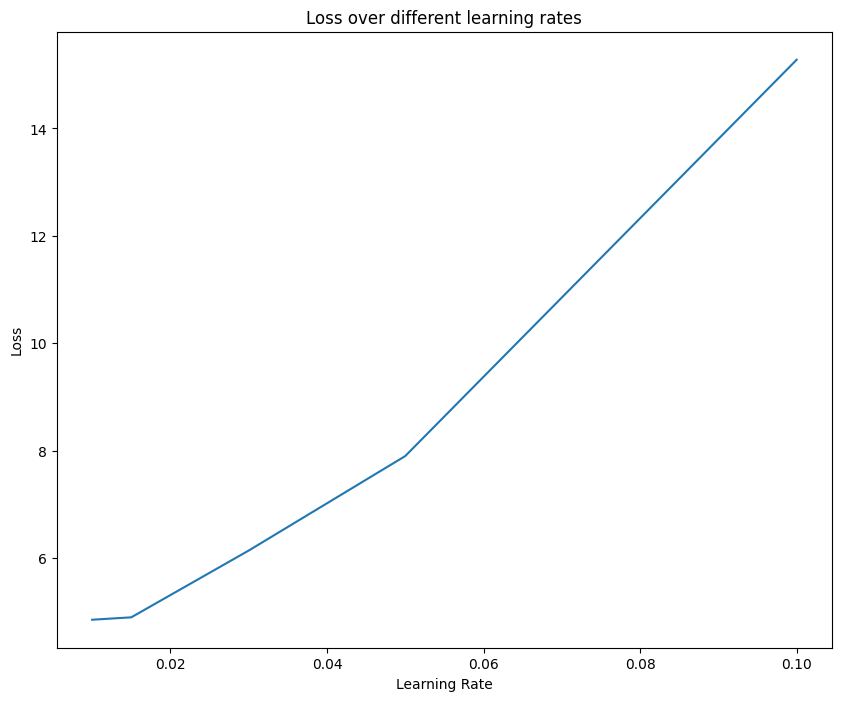

In [49]:
# plot loss over different alphas
plt.figure(figsize=(10, 8))

plt.title('Loss over different learning rates')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.plot(alphas, losses)
plt.show()

# 0.01 is determined to be the optimal learning rate

### Plot loss over training using optimal lr

Loss on iteration 10000 = 5.0606953783205135
Loss on iteration 20000 = 3.7843500688079135
Loss on iteration 30000 = 4.770748714219407
Loss on iteration 40000 = 3.466904406536854
Loss on iteration 50000 = 3.7075760415082097
Loss on iteration 60000 = 4.395797358474534


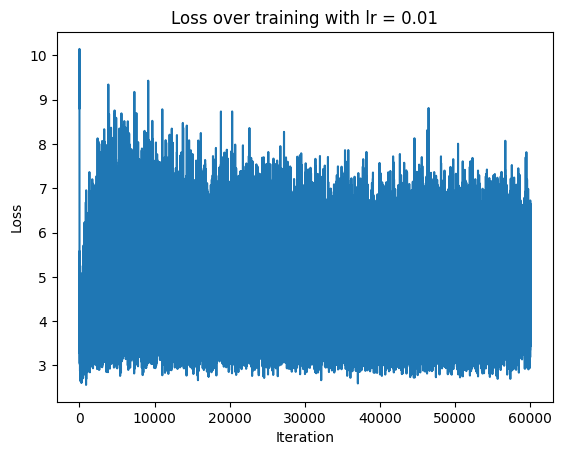

In [52]:
# Initialize Neural Network 
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.01,
    train_X=full_train_X,
    train_Y=full_train_Y,
)
nn.setTestData(test_X=full_test_X, test_Y=full_test_Y)

# train 
losses = nn.train()

# plot 
itr = [i + 1 for i in range(len(nn.train_X))]

plt.title('Loss over training with lr = 0.01')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(itr, losses)
plt.show()

### Batch Gradient Descent

In [74]:
# Combined train and test datasets 
X = np.concatenate((full_train_X, full_test_X), axis=0)
Y = np.concatenate((full_train_Y, full_test_Y), axis=0)

# Check shape 
print(X.shape)
print(Y.shape)

# init NN
nn = NN(
    numNeurons=[784, 200, 100, 10],
    alpha=0.01,
)
nn.setTestData(test_X=full_test_X, test_Y=full_test_Y)


batch_size = 10000 
N = X.shape[0]

for i in range(int(N/batch_size)):
    X_batch = X.take(range(i, i + batch_size), axis=0, mode="wrap")
    Y_batch = Y.take(range(i, i + batch_size), axis=0, mode="wrap")

    nn.setTrainData(X_batch, Y_batch)
    nn.train()

nn.test()


(70000, 784)
(70000, 10)
Loss on iteration 10000 = 5.940715983002081
Loss on iteration 10000 = 7.231163045545308
Loss on iteration 10000 = 3.4433158866605456
Loss on iteration 10000 = 4.878399398258377
Loss on iteration 10000 = 4.292531213135342
Loss on iteration 10000 = 4.472321406598918
Loss on iteration 10000 = 3.6382657665298606
Accuracy = 0.8991
Average loss = 4.840418394933939


(0.8991, 4.840418394933939)